# Actionability_AllData_Tsv_v15_GRCh37.tar
URL: [https://cancer.sanger.ac.uk/actionability](https://cancer.sanger.ac.uk/actionability)

**Notes:**
* for non-commercial and academic use only
* do not redistribute

In [29]:
import logging

logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s'
)

import base64
import hashlib
import io
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import seaborn as sns
import os
import pandas as pd
import requests
import tarfile

from IPython.display import IFrame, HTML, JSON
from tqdm.notebook import trange, tqdm

In [2]:
def sha256_checksum(file_path):
    sha256 = hashlib.sha256()
    with open(file_path, 'rb') as f:
        for chunk in iter(lambda: f.read(8192), b''):
            sha256.update(chunk)
    return sha256.hexdigest()

In [3]:
filename = 'Actionability_AllData_Tsv_v15_GRCh37.tar'
file_checksum_sha256 = '3f34f5d053437d98f2f2fea20dc2a981fa20181ba5e4359e55e2e2a3aff1943a'

if not os.path.exists(filename) or (os.path.exists(filename) and sha256_checksum(filename) != file_checksum_sha256):
    logging.info('Downloading: %s' % filename)
    auth_token=''
    resp = !curl -s -H 'Authorization: Basic {auth_token}' 'https://cancer.sanger.ac.uk/api/mono/products/v1/downloads/scripted?path=grch37/actionability/v15/Actionability_AllData_Tsv_v15_GRCh37.tar&bucket=downloads' | jq
    resp = json.loads('\n'.join(resp))
    logging.info('%s' % json.dumps(resp, indent=2))

    resp = requests.get(resp['url'])
    
    if resp.status_code == 200:
        with open(filename, 'wb') as f:
            f.write(resp.content)
        if sha256_checksum(filename) == file_checksum_sha256:
            logging.info('File downloaded successfully.')
        else:
            logging.error('invalid file downloaded, checksum does not match, deleting ...')
            os.remove(filename)
    else:
        logging.error(f"Failed to download file. Status code: {resp.status_code}")
        logging.error('Response: %s', resp.text)
else:
    logging.info('File already downloaded')

2025-07-01 06:17:36,219 - INFO - File already downloaded


In [4]:
df = None
pdf_html = None

with tarfile.open(filename, 'r') as tar:
    for member in tar.getmembers():
        if member.name.lower().endswith('.tsv') and not df:
            f = tar.extractfile(member)
            if f:
                df = pd.read_csv(io.TextIOWrapper(f), sep='\t', low_memory=False)
        elif member.name.lower().endswith('.pdf') and not pdf_html:
            f = tar.extractfile(member)
            if f:
                pdf_bytes = f.read()
                # Encode PDF in base64
                encoded_pdf = base64.b64encode(pdf_bytes).decode('utf-8')
                # Create a data URI for the PDF
                data_uri = f"data:application/pdf;base64,{encoded_pdf}"
                # Create an HTML iframe to display the PDF
                pdf_html = f'''
                    <iframe src="{data_uri}" width="100%" height="800px" style="border: none;"></iframe>
                '''

In [5]:
# Display the iframe in the notebook
display(HTML(pdf_html))

In [6]:
display(df)

,MUTATION_REMARK,MUTATION_SELECTIVITY,GENOMIC_MUTATION_ID,FUSION_ID,MUTATION_AA_SYNTAX,DISEASE,ACTIONABILITY_RANK,ACTIONABILITY_RANK_DESCRIPTION,DEVELOPMENT_STATUS,DRUG_COMBINATION,...,RFS_CON,RFS_HR,RFS_CI,RFS_PVAL,BLOOD_RESPONSE,RESPONSE_VALUE,TIMEPOINT,TRIAL_OUTCOME,CLASSIFICATION_ID,LAST_UPDATED
0,(BCL2_unspecified or BCL6_unspecified) and MYC...,Set,NaN,NaN,NaN,haematopoietic and lymphoid tissue / lymphoid ...,3,In trials,Phase 2,"Cyclophosphamide,Doxorubicin hydrochloride,Eto...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,COSO279817502,2025Jan08
1,(BCL2_unspecified or BCL6_unspecified) and MYC...,Set,NaN,NaN,NaN,haematopoietic and lymphoid tissue / lymphoid ...,3,In trials,Phase 1,Tegavivint,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,COSO27984799,2023Apr03
2,(BCL2_unspecified or BCL6_unspecified) and MYC...,Set,NaN,NaN,NaN,haematopoietic and lymphoid tissue / lymphoid ...,3,In trials,Phase 1,"Cytarabine,Etoposide,Hematopoietic stem cell t...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,COSO27984799,2024Aug01
3,(BCL2_unspecified or BCL6_unspecified) and MYC...,Set,NaN,NaN,NaN,haematopoietic and lymphoid tissue / lymphoid ...,3,In trials,Phase 1,"Cyclophosphamide,Doxorubicin hydrochloride,Eto...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,COSO27984799,2024Oct17
4,(BCL2_unspecified or BCL6_unspecified) and MYC...,Set,NaN,NaN,NaN,haematopoietic and lymphoid tissue / lymphoid ...,3,In trials,Phase 1,"RO6870810,Rituximab,Venetoclax",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,COSO27984799,2023Dec22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14107,t(11;14) (CCND1),Region,NaN,NaN,NaN,haematopoietic and lymphoid tissue / lymphoid ...,3,In trials,Phase 2,"CD20 Ab,Ibrutinib,Venetoclax",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,COSO27985712,2023Dec04
14108,t(11;14) (CCND1) and MS4A1_unspecified,Multigene,NaN,NaN,NaN,haematopoietic and lymphoid tissue / lymphoid ...,3,In trials,Phase 2,"Acalabrutinib,Rituximab",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,COSO27985712,2024Jan04
14109,t(14;18) (BCL2),Region,NaN,NaN,NaN,haematopoietic and lymphoid tissue / lymphoid ...,3,In trials,Phase 1,Ribavirin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,COSO27985697,2023Apr28
14110,t(8;21) (RUNX1) and CD19_unspecified,Multigene,NaN,NaN,NaN,haematopoietic and lymphoid tissue / haematopo...,3,In trials,Phase 3,"Anti-CD19 CAR T-cells,Cyclophosphamide,Fludara...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,COSO27984905,2025Jan08


In [7]:
def barplot(df, column, title='', percentile=1.0):
    if title == '':
        title = column
    plt.figure(figsize=(11, 6))
    g = sns.barplot(df.groupby(df[column])[column].count().sort_values(ascending=False)[:np.int32(len(df)*percentile)].reset_index(name="count"), x=column, y='count')
    # Add labels above bars
    for container in g.containers:
        g.bar_label(container, fmt='%d', label_type='edge', padding=0)
    g.xaxis.set_major_locator(mticker.FixedLocator(g.get_xticks()))
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.title(title)
    plt.show()

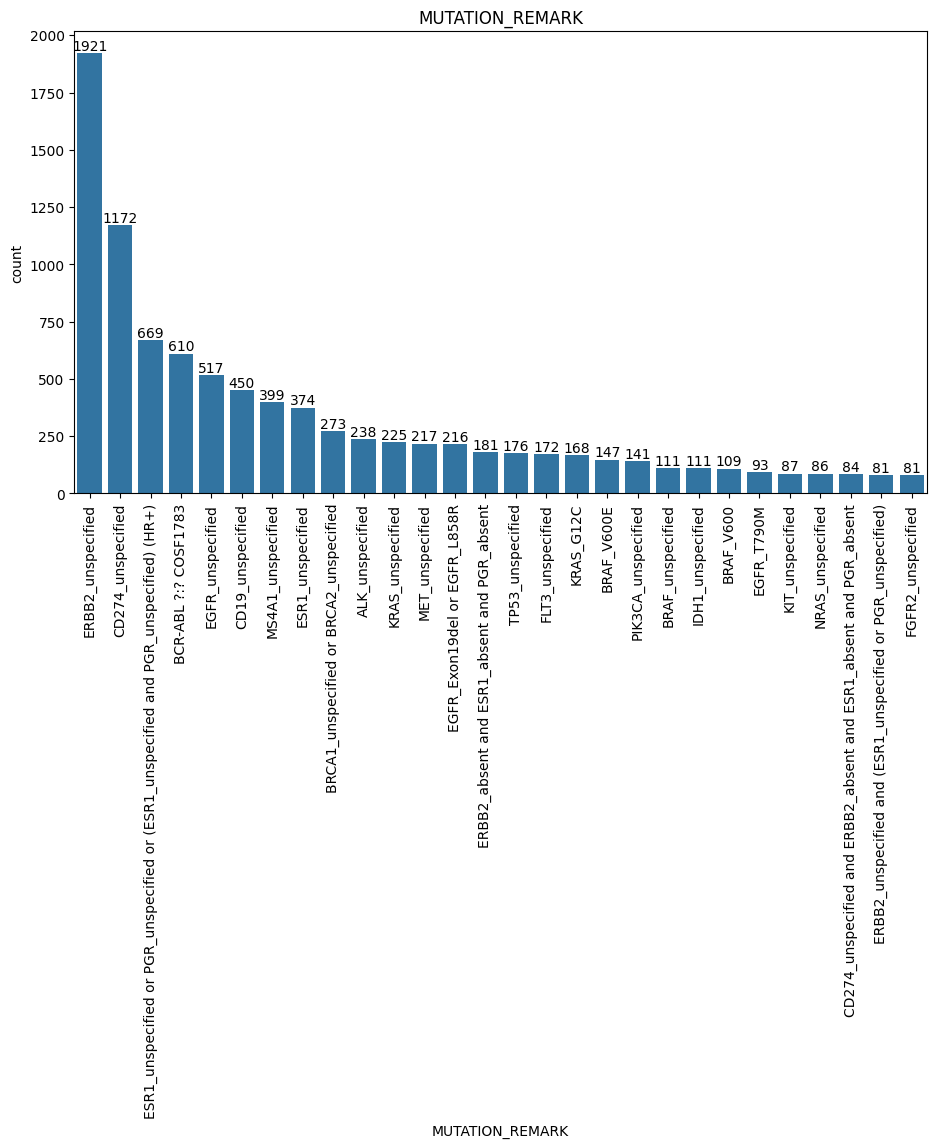

In [8]:
barplot(df, 'MUTATION_REMARK', percentile=1/500)

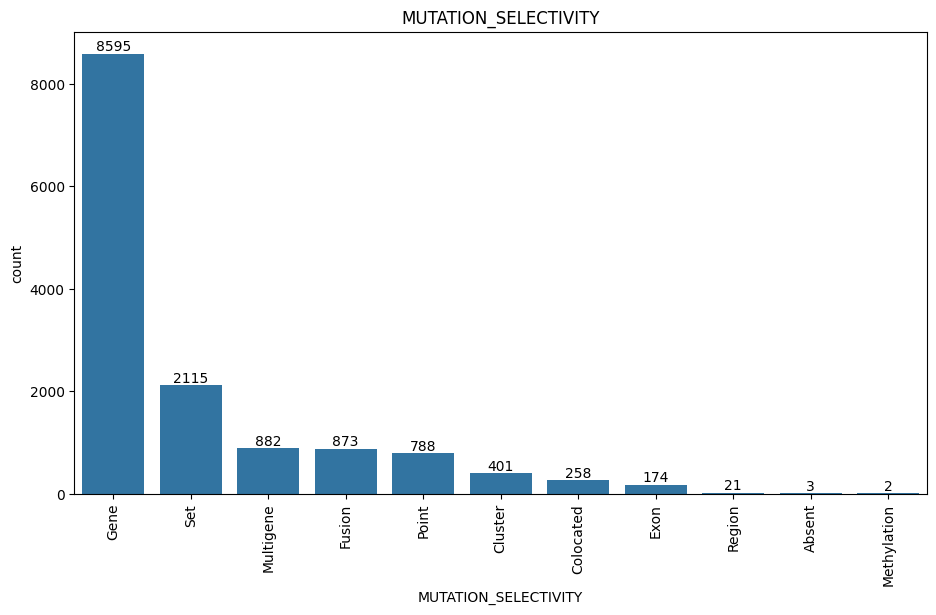

In [9]:
barplot(df, 'MUTATION_SELECTIVITY')

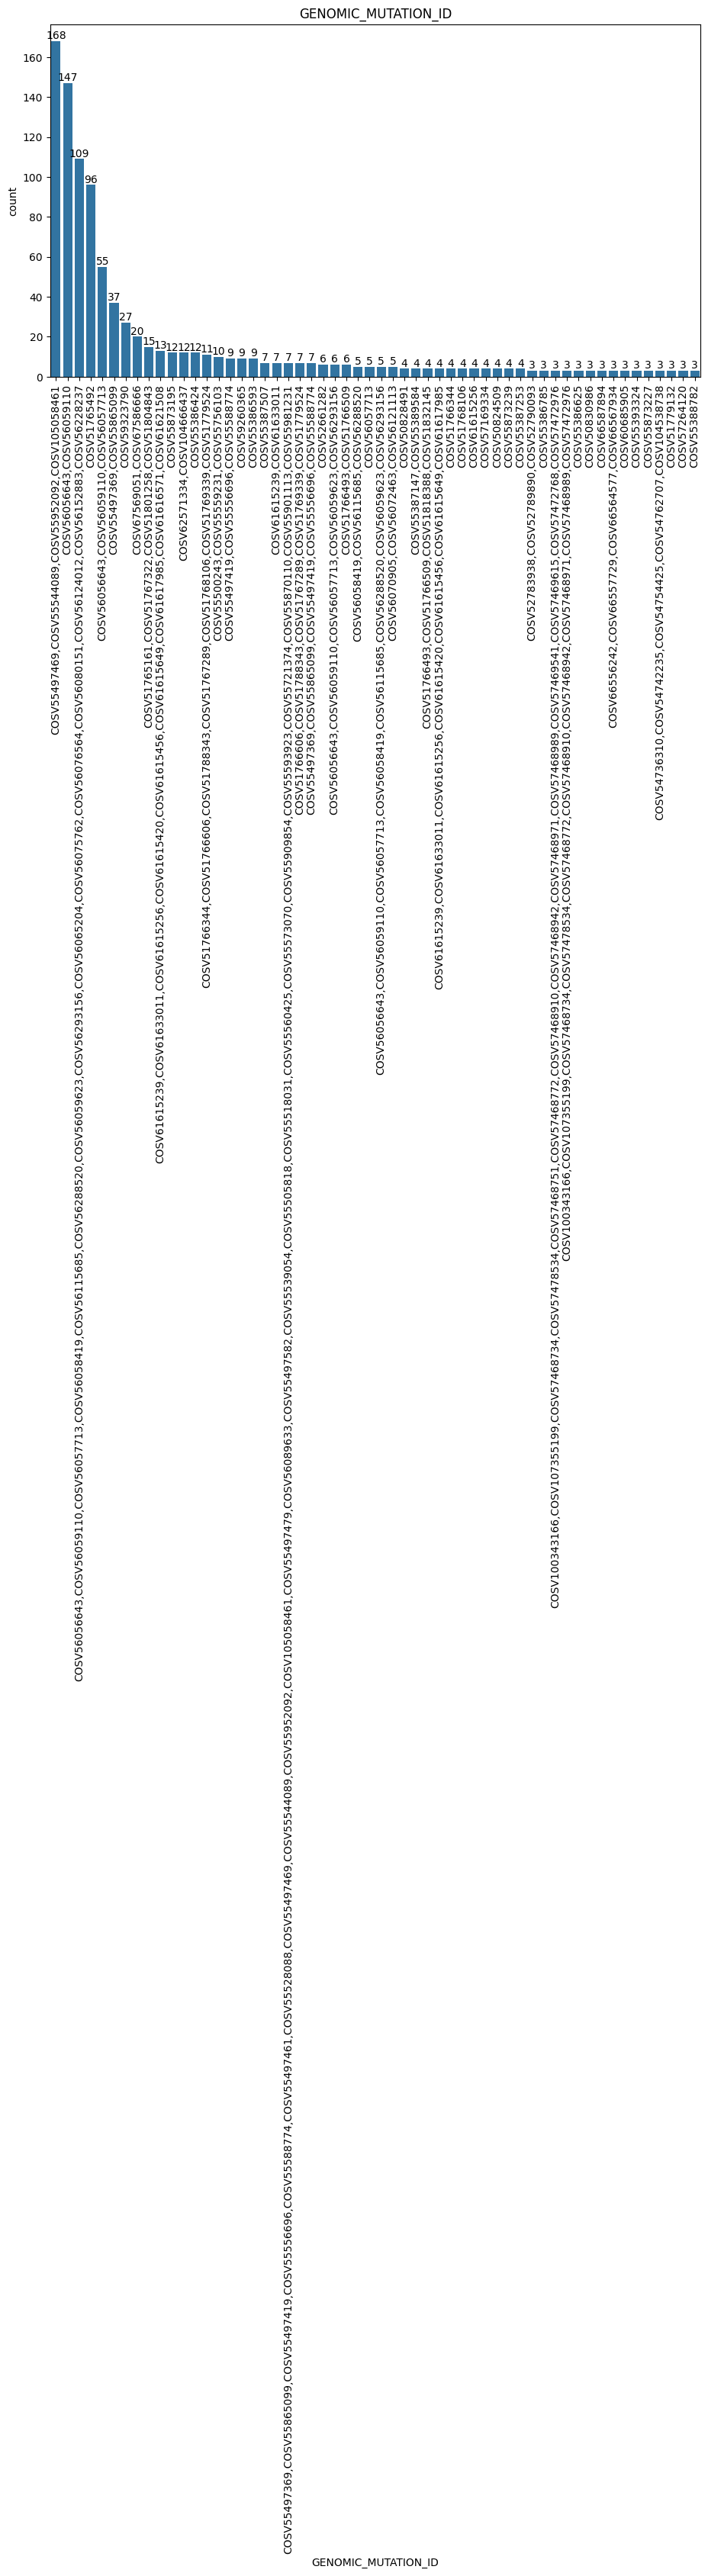

In [10]:
barplot(df, 'GENOMIC_MUTATION_ID', percentile=1/250)

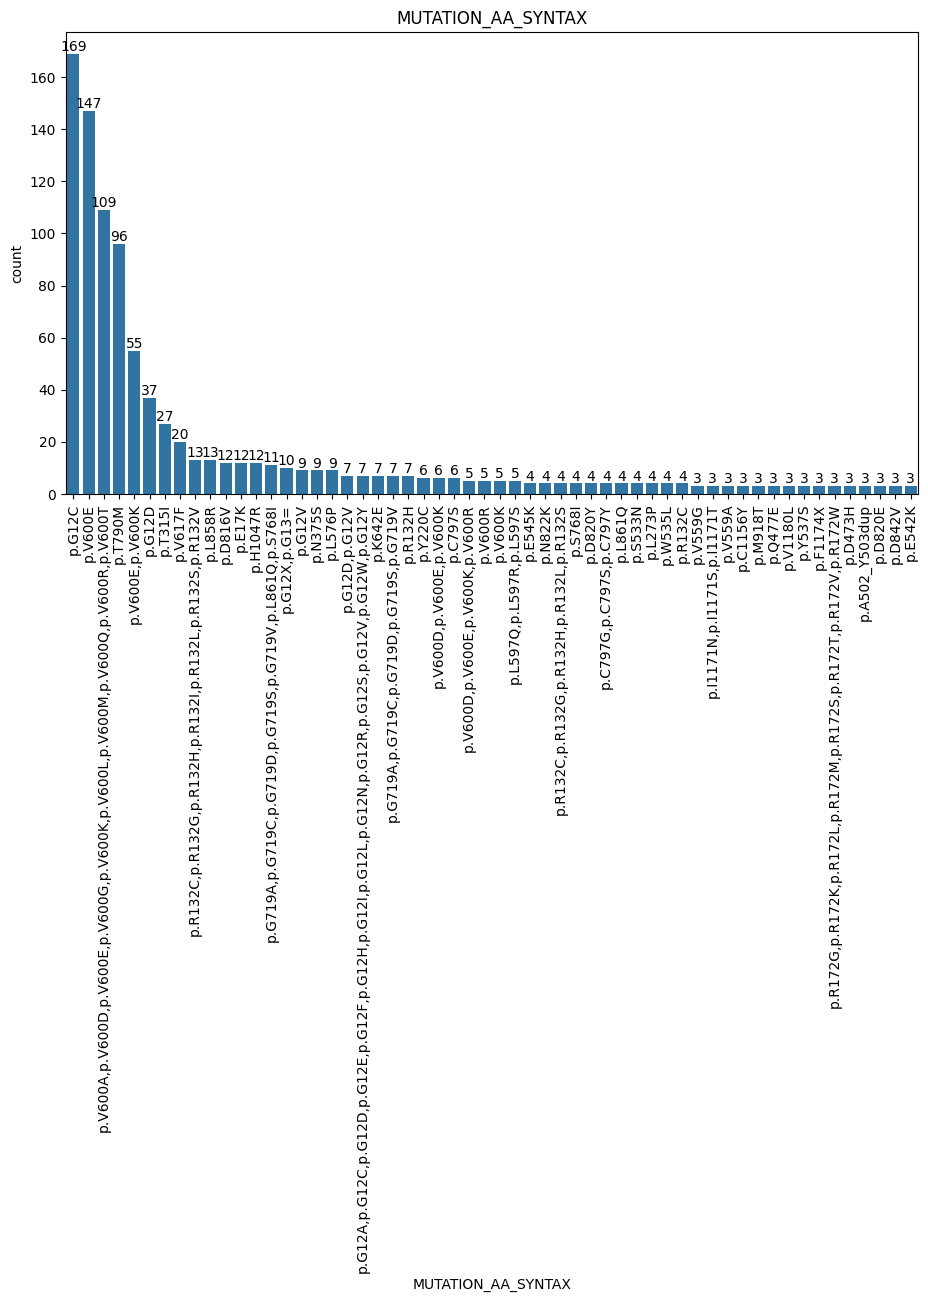

In [11]:
barplot(df, 'MUTATION_AA_SYNTAX', percentile=1/250)

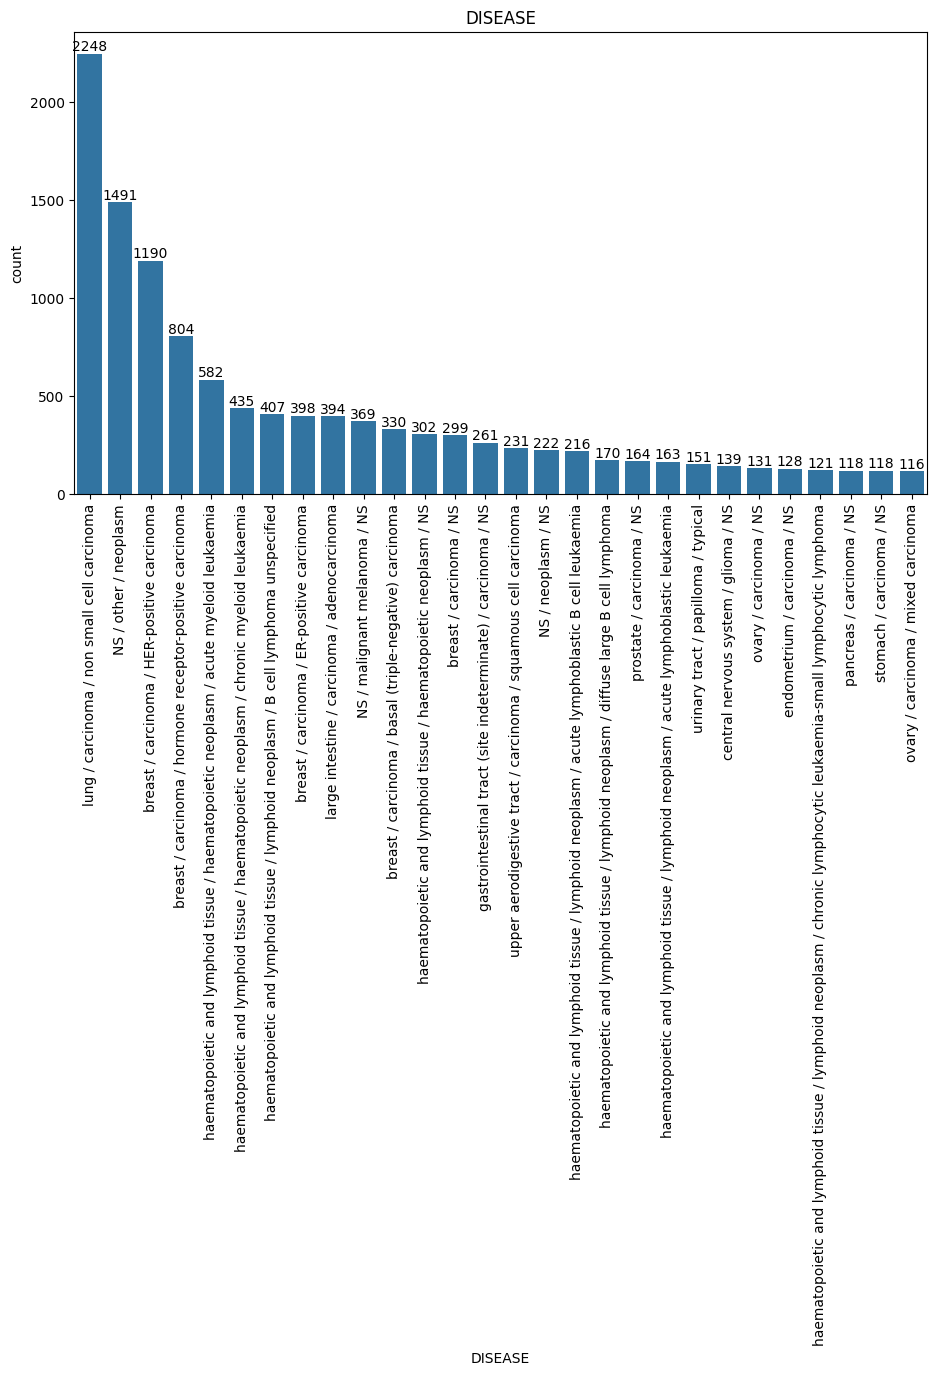

In [12]:
barplot(df, 'DISEASE', percentile=1/500)

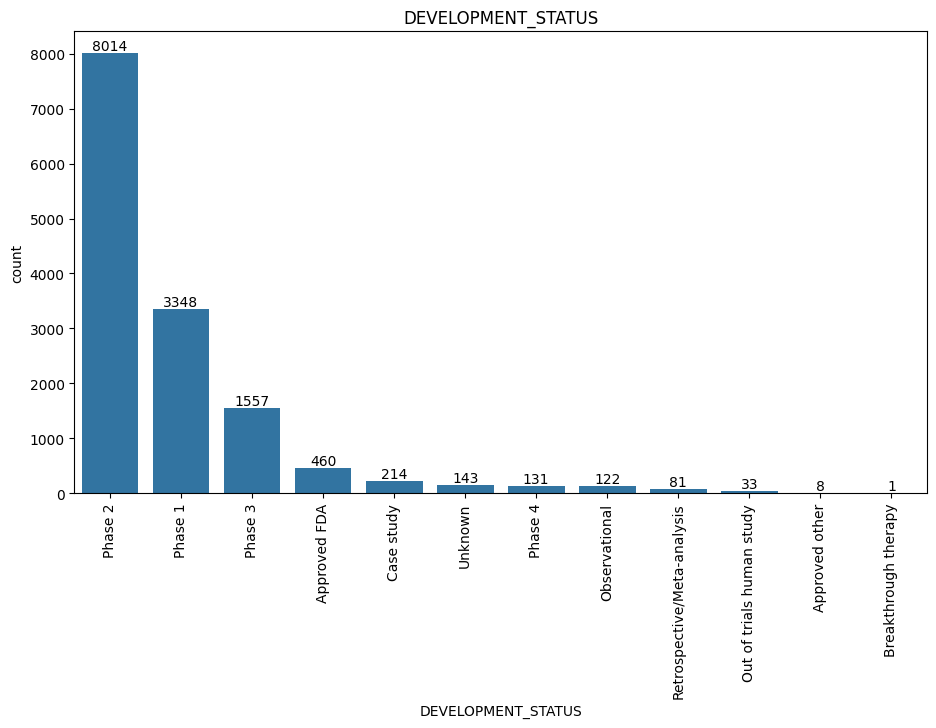

In [13]:
barplot(df, 'DEVELOPMENT_STATUS')

In [14]:
df[['DEVELOPMENT_STATUS']].describe()

,DEVELOPMENT_STATUS
count,14112
unique,12
top,Phase 2
freq,8014


In [15]:
df_disease = pd.DataFrame(df['DISEASE']).apply(lambda x: x.str.split("/")).explode('DISEASE')
df_disease.reset_index(drop=True, inplace=True)
df_disease

,DISEASE
0,haematopoietic and lymphoid tissue
1,lymphoid neoplasm
2,AIDS related lymphoma
3,haematopoietic and lymphoid tissue
4,lymphoid neoplasm
...,...
42331,haematopoietic neoplasm
42332,acute myeloid leukaemia
42333,haematopoietic and lymphoid tissue
42334,haematopoietic neoplasm


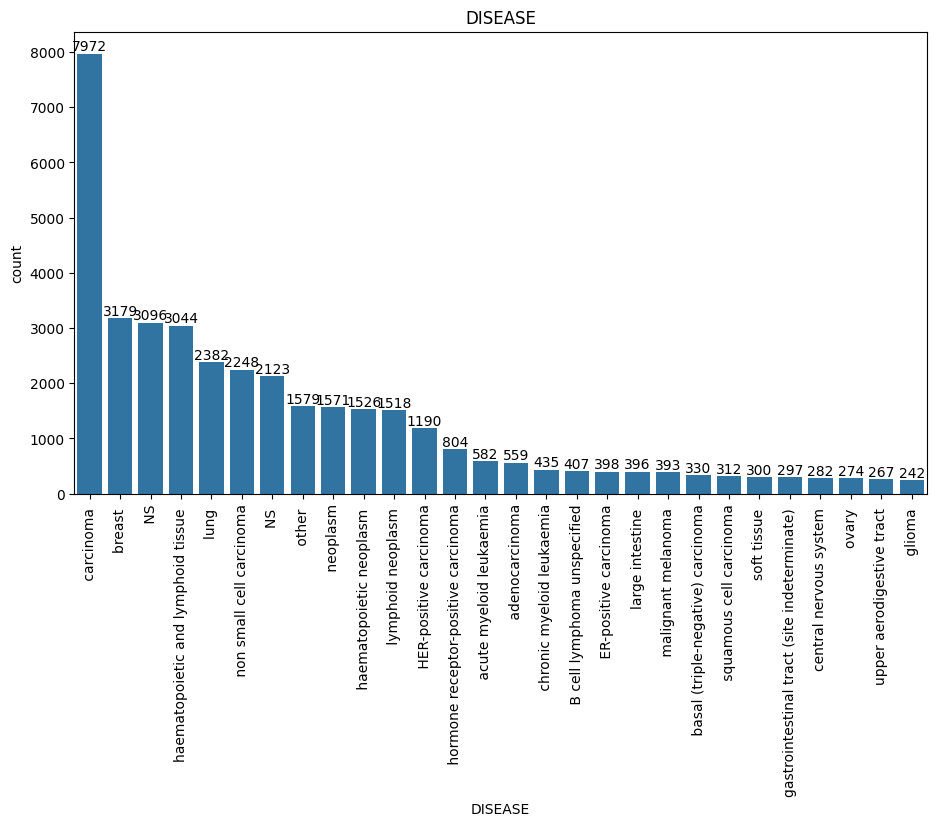

In [16]:
barplot(df_disease, 'DISEASE', percentile=1/1500)

In [17]:
df_disease.describe()

,DISEASE
count,42336
unique,201
top,carcinoma
freq,7972


In [18]:
df_mutation_ids = pd.DataFrame(df['GENOMIC_MUTATION_ID']).apply(lambda x: x.str.split(",")).explode('GENOMIC_MUTATION_ID')
df_mutation_ids.reset_index(drop=True, inplace=True)
df_mutation_ids

,GENOMIC_MUTATION_ID
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
17387,NaN
17388,NaN
17389,NaN
17390,NaN


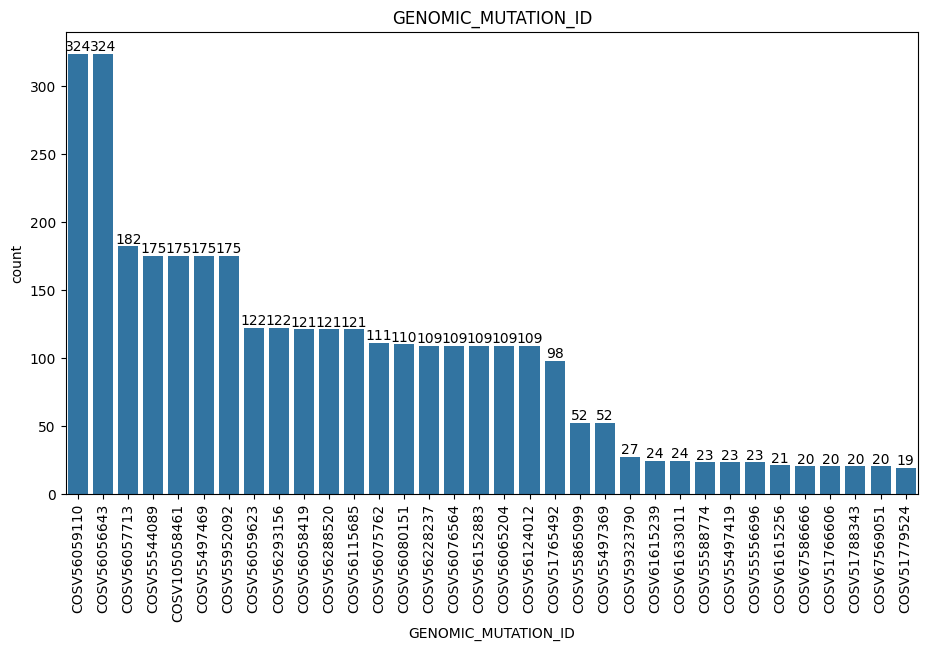

In [19]:
barplot(df_mutation_ids, 'GENOMIC_MUTATION_ID', percentile=1/500)

In [20]:
df_mutation_ids.describe()

,GENOMIC_MUTATION_ID
count,4373
unique,370
top,COSV56056643
freq,324


In [21]:
df_drugs = pd.DataFrame(df['DRUG_COMBINATION']).apply(lambda x: x.str.split(",")).explode('DRUG_COMBINATION')
df_drugs.reset_index(drop=True, inplace=True)
df_drugs

,DRUG_COMBINATION
0,Cyclophosphamide
1,Doxorubicin hydrochloride
2,Etoposide
3,Prednisone
4,Rituximab
...,...
28067,Cyclophosphamide
28068,Fludarabine
28069,Azacitidine
28070,Sorafenib


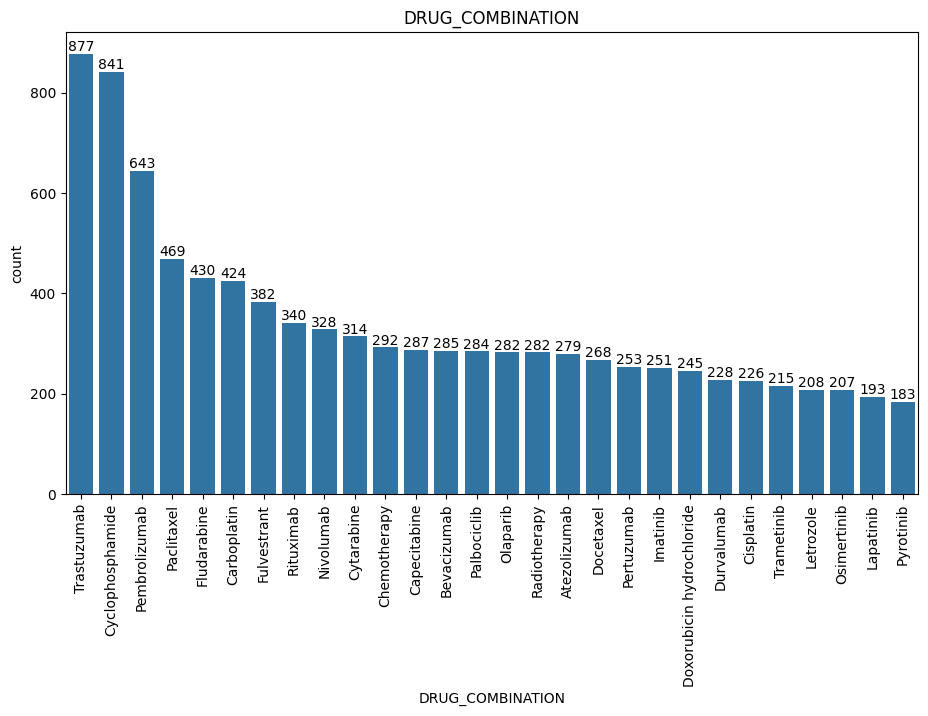

In [22]:
barplot(df_drugs, 'DRUG_COMBINATION', percentile=1/1000)

In [23]:
df_drugs.describe()

,DRUG_COMBINATION
count,28070
unique,2465
top,Trastuzumab
freq,877


In [24]:
df_blood_response = pd.DataFrame(df['BLOOD_RESPONSE']).apply(lambda x: x.str.split(",")).explode('BLOOD_RESPONSE')
df_blood_response.reset_index(drop=True, inplace=True)
df_blood_response

,BLOOD_RESPONSE
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
14157,NaN
14158,NaN
14159,NaN
14160,NaN


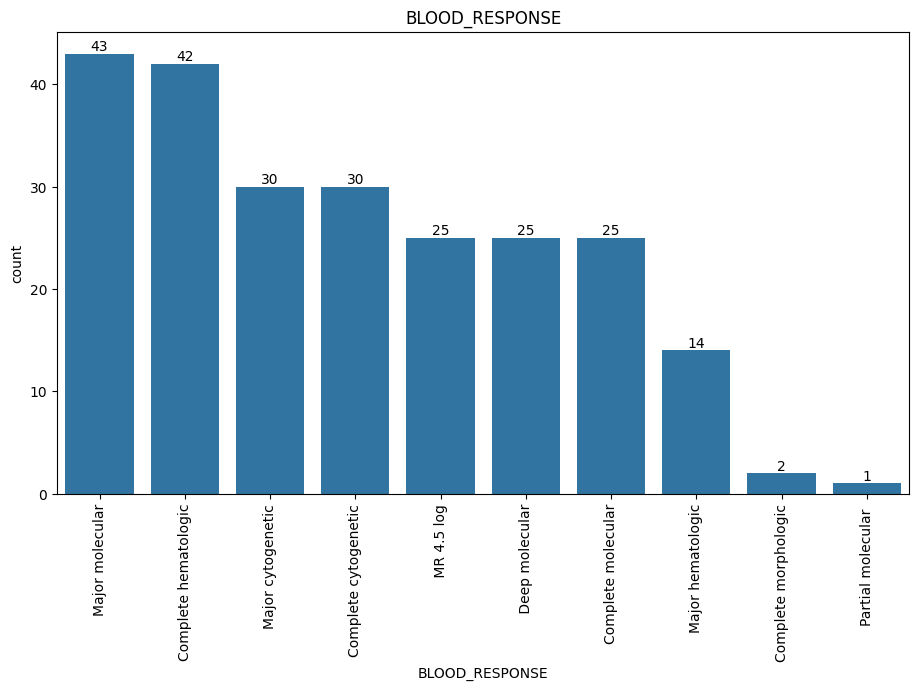

In [25]:
barplot(df_blood_response, 'BLOOD_RESPONSE', percentile=1/1000)

In [26]:
df_blood_response.describe()

,BLOOD_RESPONSE
count,237
unique,10
top,Major molecular
freq,43


In [27]:
df_drugs = df_drugs.groupby('DRUG_COMBINATION')['DRUG_COMBINATION'].count().sort_values(ascending=False).reset_index(name='count')

<Axes: ylabel='Count'>

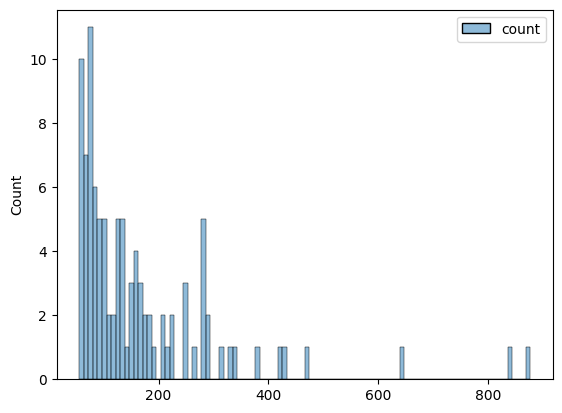

In [28]:
sns.histplot(df_drugs[:100], bins=100)